In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data

,FedFunds,Unemployment,HousingStarts,Inflation
1947-01-01,NaN,NaN,NaN,21.480
1947-02-01,NaN,NaN,NaN,21.620
1947-03-01,NaN,NaN,NaN,22.000
1947-04-01,NaN,NaN,NaN,22.000
1947-05-01,NaN,NaN,NaN,21.950
...,...,...,...,...
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619
2023-11-01,5.33,3.7,1560.0,307.917


In [6]:
data.dropna(inplace = True)

In [8]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [9]:
split_1 = int(len(data) * 0.6)
split_2 = int(len(data) * 0.9)
data_in = data[:split_1] # does not include the row of "split_1"
data_out = data[split_1:split_2] # include the row of "split_1", not include the row of "split_2"
data_hold = data[split_2:]

In [48]:
X_in = data_in.iloc[:, 1:] # select all rows, select all columns except the first column
y_in = data_in.iloc[:, 0] # select all rows, select only the first column
X_out = data_out.iloc[:, 1:]
y_out = data_out.iloc[:, 0]
X_hold = data_hold.iloc[:, 1:]
y_hold = data_hold.iloc[:, 0]

In [49]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [46]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph for your model

In [25]:
import matplotlib.pyplot as plt

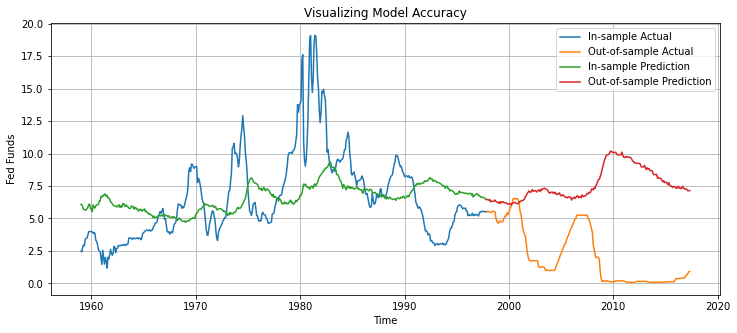

In [54]:
plt.figure(figsize = (12,5))

###
in_pred = model1.predict(X_in)
out_pred = model1.predict(X_out)

plt.plot(y_in)
plt.plot(y_out)
plt.plot(in_pred)
plt.plot(out_pred)

###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(['In-sample Actual', 'Out-of-sample Actual', 'In-sample Prediction', 'Out-of-sample Prediction'])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [30]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566732


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
PolynomialFeatures?

In [37]:
max_degrees = 3

DEGREE :  1


/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


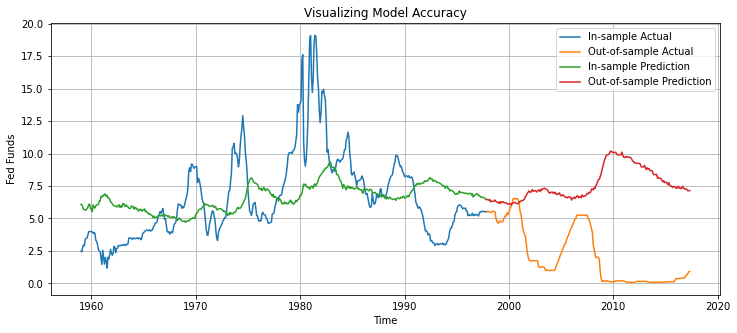

Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835665916
DEGREE :  2


/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  ar

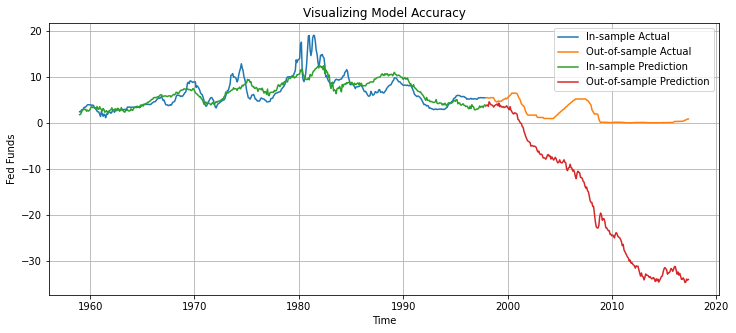

/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  ar

Insample MSE :  3.863477139276069
Outsample MSE :  481.44650991792037
DEGREE :  3


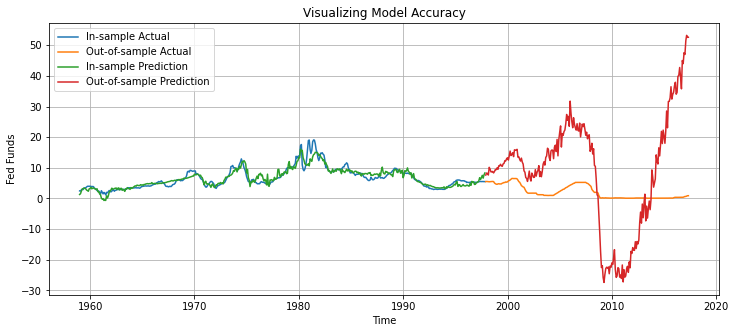

Insample MSE :  1.8723636267594668
Outsample MSE :  371.7677889463972


/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [55]:
for degrees in range(1, max_degrees+1):
    print("DEGREE : ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in) ###
    X_out_poly = poly.transform(X_out) ###
    
    model = sm.OLS(y_in, X_in_poly).fit()
    
    in_pred = model.predict(X_in_poly)
    out_pred = model.predict(X_out_poly)
    
    # Align the time index of y_in & in_pred and y_out & out_pred in your plots
    time_index_in = X_in.index
    time_index_out = X_out.index
    in_pred = pd.DataFrame(in_pred, index=time_index_in)
    out_pred = pd.DataFrame(out_pred, index=time_index_out)

    plt.figure(figsize = (12,5))

    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_pred)
    plt.plot(out_pred)

    ###
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(['In-sample Actual', 'Out-of-sample Actual', 'In-sample Prediction', 'Out-of-sample Prediction'])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(in_pred, y_in)
    out_mse_1 = mean_squared_error(out_pred, y_out)
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

- When polynomial degree of model is 1:
    - The model is relatively simplistic. The model relatively underfit the training data, which is shown in the graph that there is an obvious deviation of in-sample prediction from in-sample actual data. 
    - But the predictive performance of the model is better than the other two models with degrees of 2 and 3 respectively, showing a good generalization to unseen data.

- When polynomial degree of model is 2:
    - The model is more complex than model with polynomial degree of 1. This model fits the training data better as shown in the graph.
    - But the predictive performance of the model is bad due to overfitting problem, as shown in the graph that the out-of-sample prediction deviate largely from the out-of-sample actual data.

- when polynomial degree of model is 3:
    - The model is even complex than model with polynomial degree of 2. This model overfits the training data.
    - But the predictive performance of the model also shows poor generalization due to overfitting problem, as shown in the graph that the out-of-sample prediction deviate even largely from the out-of-sample actual data.
     